# Guided Activity Three
## Orbital Motion

Round three with Python! 

We will be building a model of orbital motion. This is the first time we will be applying the euler method in more than a single dimension. Let's again try to enfore code re-use: we may need to generalize our alorithms to accept tuples?

As usual, we start with imports.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
def gravitational_acceleration(x, v, m, M=5.972e24, G=6.67408e-11):
    ''' Return x and y components of acceleration due to gravitity.
    
        Uses:
                    G * m * M / r**2
                    
        Args:
            G (float):   gravitational constant (m**3/(kg * s**2)))
            M (float):   mass of larger object (kg; default is Earth)
            m (float):   mass of smaller object (kg)
            x (float):   x distance from larger object (m)
            y (float):   y distance from larger object (m)
        
        Return:
            [float, float]: direction vector
    '''
    
    r = np.sqrt(np.sum(x**2))
    a = -1 * (G * M / (r*r*r)) * x
    
    return a

Now let's reuse the Euler method from our last excercise, being careful to make sure it will accept array inputs. Let's try and really tear up this function. I want to write it in super fast numpy arrays.

In [14]:
def euler_method(acceleration, t0, tf, dt, x0=0, v0=0, modified=False, **kwargs):
    ''' Returns t, x, v, and a arrays for Euler Method

        Args:
            acceleration (func):  a function that accepts x, v, and **kwargs and 
                                      return acceleration.
            t0 (float):           initial time (s)
            tf (float):           final time (s)
            dt (float):           time step (s)
            x0 (np.array):        initial displacement, downwards positive (m)
            v0 (np.array):        intiial velocity, downwards positive (m/s)
            **kwargs:             any additional arguments required for the 
                                      accleration function

            modified (bool):	turns on modified euler method.

        Returns:
            np.float64 (np.array): lisf times (s)
            np.float64 (np.array): list of positions, downwards positive (m)
            np.float64 (np.array): list of velocities, downwards positive (m/s)
            np.float64 (np.array): list of acceleration, downwards positive (m/s**2)
    '''

    t = np.arange(start=t0, stop=tf, step=dt, dtype=np.float64)
    
    points = t.size
    dimensions, = x0.shape
    
    x = np.empty([points, dimensions])
    v = np.empty([points, dimensions])
    a = np.empty([points, dimensions])
    
    x[0] = x0
    v[0] = v0
    a[0] = acceleration(x0, v0, **kwargs)

    for i in range(1, points):
        a[i] = acceleration(x[i-1], v[i-1], **kwargs)
        
        if modified:
            v[i] = v[i-1] + dt * a[i]
            x[i] = x[i-1] + dt * v[i]
        else:        
            x[i] = x[i-1] + dt * v[i-1]
            v[i] = v[i-1] + dt * a[i]
        
    return t, x, v, a

For style points, I will use the `PyEphem` library to grab the current location and velocity of the moon for x0 and v0.

In [2]:
import ephem



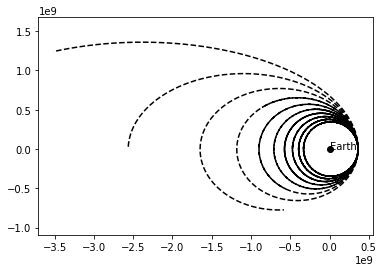

In [29]:
for mult in list(np.linspace(1.0, 1.4, 10)):
    x0 = np.asarray([363104000, 0], dtype=np.float64)
    v0 = np.asarray([0, 1023 * mult], dtype=np.float64)
    m = 100

    t, x, v, a = euler_method(gravitational_acceleration,
                                x0 = x0,
                                v0 = v0,
                                t0 = np.asarray(0.0, dtype=np.float64),
                                tf = np.asarray(60*60*24*100, dtype=np.float64),
                                dt = np.asarray(60*30, dtype=np.float64),
                                modified=True,
                                m=m)

    plt.plot(x[:,0], x[:,1], color='black', linestyle='--')
    
plt.plot(0, 0, marker='o', color='black')
plt.annotate('Earth', (0,0))
plt.axis('equal')
plt.show()

### Excercise 1

Recall that in class when we built the gravitational model fo the moon orbiting the Earth with a spreadsheet, we employed the modified Euler method (also known as the Euler-Cromer method) to complete the model. To gain an appreciation of why it is important to use this modified algorithm, first build a compuational (MATLAB or C) model of the moon's orbit arund Earth using the simple, non-modified Euler method. What happens to the moon's trajectory in your model (Hint: somethind disatrous!)? Provide plost of the moon's trajectory to demonstrate this disastrous behavior. Can you get reid fo the artifical behavior by making $\Delta t$ smaller? Next, build the model (MATLAB or C) using the EUler-Cromer method. Demonstrate your model porduces the correct period of orbit. Finally, try to make an intelligen comment about why the Euler-Cromer algorithm owrks, and the non-modified Euler algorithm does not. Is there soemthing you can calculated and plot that may provide insite into why the Euler algorithm fails?

#### Solution 1

### Exercise 2

Alter your (MATLAB or C) program to model the orbital trajectory of Halley's Commet around the Sun. Produce plots of the orbital trajectory and demonstrate that your model correctly simulated the period, the aphelion, and perihelion of teh comet's orbit. Don't forget to address the accuracy issue (what is a sufficiently small $\Delta t$?